In [42]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [44]:
data_df = pd.read_csv("Project_data_csv")

In [45]:
data_df.shape

(270223, 30)

In [46]:
data_df.head()

,Unnamed: 0,batting_team,bowling_team,innings_num,over_col,ball_col,Match ID,Start Date,Runs,Running Total,...,Wickets Remaining,Extras,Over and Balls Total,Team Value,DLS %,Target Score,Ground RPO,Ground RPW,Batting Team Result DLS,DLS Correct?
0,0,Pakistan,Australia,2,20,1,1000887,2017-01-13,0,91,...,7,N/E,55,16,38.6,104,4.79,29.31,Australia,Yes
1,1,Pakistan,Australia,2,20,2,1000887,2017-01-13,0,91,...,7,N/E,55,16,38.8,104,4.79,29.31,Australia,Yes
2,2,Pakistan,Australia,2,20,3,1000887,2017-01-13,0,91,...,7,N/E,55,16,38.9,105,4.79,29.31,Australia,Yes
3,3,Pakistan,Australia,2,20,4,1000887,2017-01-13,0,91,...,7,N/E,55,16,39.1,105,4.79,29.31,Australia,Yes
4,4,Pakistan,Australia,2,20,5,1000887,2017-01-13,1,92,...,7,N/E,55,16,39.3,106,4.79,29.31,Australia,Yes


In [47]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               270223 non-null  int64  
 1   batting_team             270223 non-null  object 
 2   bowling_team             270223 non-null  object 
 3   innings_num              270223 non-null  int64  
 4   over_col                 270223 non-null  int64  
 5   ball_col                 270223 non-null  int64  
 6   Match ID                 270223 non-null  int64  
 7   Start Date               270223 non-null  object 
 8   Runs                     270223 non-null  int64  
 9   Running Total            270223 non-null  int64  
 10  Batter out               270223 non-null  object 
 11  Wickets taken            270223 non-null  int64  
 12  Start Team               270223 non-null  object 
 13  Remaining Team           270223 non-null  object 
 14  Venu

Do I need to change the original data code to change batting team and bowling team to team 1 and team 2?  And should I remove 

In [48]:
winner_no = []
for index, row in data_df.iterrows():
    if row['Winner'] == row['batting_team']:
        winner_no.append(2)
    elif row['Winner'] == row['bowling_team']:
        winner_no.append(1)
    else:
       winner_no.append(0)

In [49]:
winner_no_df = pd.DataFrame(winner_no)

In [50]:
winner_no_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       270223 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


In [51]:
winner_no_df.rename(columns={0: 'Winner_num'}, inplace=True)

Turning the Team 1 win, Team 2 win and Draw numbers into 3 categories (2,1,0 respectively)

In [52]:
winner_no_df['Winner_num'] = winner_no_df.Winner_num.astype('category')


In [53]:
data_df['Winner_num'] = winner_no_df['Winner_num']

In [54]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Unnamed: 0               270223 non-null  int64   
 1   batting_team             270223 non-null  object  
 2   bowling_team             270223 non-null  object  
 3   innings_num              270223 non-null  int64   
 4   over_col                 270223 non-null  int64   
 5   ball_col                 270223 non-null  int64   
 6   Match ID                 270223 non-null  int64   
 7   Start Date               270223 non-null  object  
 8   Runs                     270223 non-null  int64   
 9   Running Total            270223 non-null  int64   
 10  Batter out               270223 non-null  object  
 11  Wickets taken            270223 non-null  int64   
 12  Start Team               270223 non-null  object  
 13  Remaining Team           270223 non-null  ob

Chose numerical values that feed into my hypothesis (wickets taken, team value, ground scores and remaining overs and balls feed into the prediction.)  Changed Winner into a numerical field for prediction as this will be the target variable.

In [55]:
data_df = data_df[['Match ID', 'Running Total', 'Wickets taken', 'First Team Innings', 'Remainder', 'Team Value', 'Ground RPO', 'Ground RPW', 'Winner_num' ]]

In [56]:
data_df.rename(columns={'Running Total': 'Team 1 Score', 'First Team Innings': 'Team 0 Score'}, inplace=True)

In [57]:
data_df

,Match ID,Team 1 Score,Wickets taken,Team 0 Score,Remainder,Team Value,Ground RPO,Ground RPW,Winner_num
0,1000887,91,3,268,29.5,16,4.79,29.31,1
1,1000887,91,3,268,29.4,16,4.79,29.31,1
2,1000887,91,3,268,29.3,16,4.79,29.31,1
3,1000887,91,3,268,29.2,16,4.79,29.31,1
4,1000887,92,3,268,29.1,16,4.79,29.31,1
...,...,...,...,...,...,...,...,...,...
270218,997995,225,3,228,3.0,13,5.40,31.64,2
270219,997995,225,3,228,2.5,13,5.40,31.64,2
270220,997995,225,3,228,2.4,13,5.40,31.64,2
270221,997995,225,3,228,2.3,13,5.40,31.64,2


In [58]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Match ID       270223 non-null  int64   
 1   Team 1 Score   270223 non-null  int64   
 2   Wickets taken  270223 non-null  int64   
 3   Team 0 Score   270223 non-null  int64   
 4   Remainder      270223 non-null  float64 
 5   Team Value     270223 non-null  int64   
 6   Ground RPO     270223 non-null  float64 
 7   Ground RPW     270223 non-null  float64 
 8   Winner_num     270223 non-null  category
dtypes: category(1), float64(3), int64(5)
memory usage: 16.8 MB


In [59]:
data_df.describe()

,Match ID,Team 1 Score,Wickets taken,Team 0 Score,Remainder,Team Value,Ground RPO,Ground RPW
count,2.702230e+05,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000
mean,6.876220e+05,157.262972,4.340881,261.399596,17.326729,12.531653,4.944435,30.351967
std,4.037781e+05,52.133525,2.190549,55.610740,7.871791,5.533073,0.353677,3.465019
min,6.481400e+04,37.000000,0.000000,91.000000,0.000000,1.000000,3.980000,20.560000
25%,3.500470e+05,118.000000,3.000000,224.000000,11.200000,8.000000,4.720000,28.180000
50%,6.361610e+05,150.000000,4.000000,260.000000,18.100000,13.000000,4.850000,29.640000
75%,1.122279e+06,190.000000,6.000000,299.000000,24.200000,17.000000,5.090000,32.440000
max,1.343685e+06,438.000000,10.000000,498.000000,30.000000,29.000000,6.910000,53.080000


#write some commentary here about the statistics

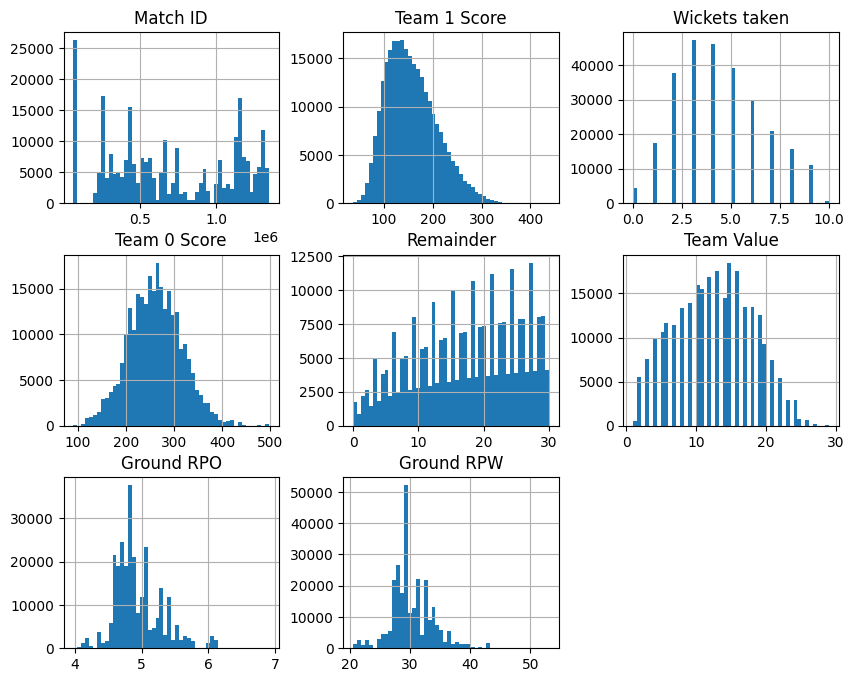

In [60]:
data_df.hist(bins=50, figsize=(10, 8))
plt.show()

Commentary

Shall I plot the Winner before I categorise?
Very imbalanced - 1 and 2 mainly fine but 0 not.

For the DLS table - does it tell you the score needed to draw or to win??  May be making this unfair.

In [64]:
filter_df = data_df[data_df['Winner_num']==0]

In [70]:

filter_df['Match ID'].nunique()

19

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/#:~:text=In%20a%20dataset%20with%20highly,obviously%20not%20the%20correct%20one.

Models

Random Forest
SVM
Neural Network